Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Plot:

The temperature
The mean temperature each day
The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

The Windspeed (there is data missing from this column)
The rolling windspeed (say over 24 hours)
The max windspeed for each day
The monthly mean of the daily max windspeeds (yer I am being nasty here)
You do not need to over comment your code. Marks will be given for how nice the plots are.

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

Use `read.csv` to import the data. Checking the data on this link shows the actual data dopes not start at row 1 so `skiprows=23` is added to the `read_csv()` to tell pandas where to find the data.

In [21]:
df = pd.read_csv("https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv", low_memory=False, skiprows=23)
df['date'] = pd.to_datetime(df['date'])
print(df.info())

C:\Users\kirst\AppData\Local\Temp\ipykernel_22264\291684874.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    247674 non-null  datetime64[ns]
 1   ind     247674 non-null  int64         
 2   rain    247674 non-null  object        
 3   ind.1   247674 non-null  int64         
 4   temp    247674 non-null  float64       
 5   ind.2   247674 non-null  int64         
 6   wetb    247674 non-null  float64       
 7   dewpt   247674 non-null  float64       
 8   vappr   247674 non-null  float64       
 9   rhum    247674 non-null  int64         
 10  msl     247674 non-null  object        
 11  ind.3   247674 non-null  int64         
 12  wdsp    247674 non-null  object        
 13  ind.4   247674 non-null  int64         
 14  wddir   247674 non-null  object        
 15  ww      247674 non-null  object        
 16  w       247674 non-null  object        
 17  sun     247674 non-null  floa

In [23]:
df['day_month'] = df['date'].dt.strftime('%d-%m')
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
print(df.head(3))

                 date  ind rain  ind.1  temp  ind.2  wetb  dewpt  vappr  rhum  \
0 1996-04-10 14:00:00    0  0.0      0  11.5      0   8.1    3.9    0.0     0   
1 1996-07-31 08:00:00    0  0.0      0  11.5      0  11.1   10.7    0.0     0   
2 1996-07-31 09:00:00    0  0.0      0  11.6      0  10.7    9.8    0.0     0   

   ...  ww   w  sun    vis clht clamt  MM-DD  month  year day_month  
0  ...  25  81  0.0  35000   32     5  10-04      4  1996     10-04  
1  ...  25  82  0.0  40000   45     5  31-07      7  1996     31-07  
2  ...  80  81  0.0   8000   32     7  31-07      7  1996     31-07  

[3 rows x 25 columns]


## Plotting the data
### Plot of the temperature

In [ ]:
print(df.columns)

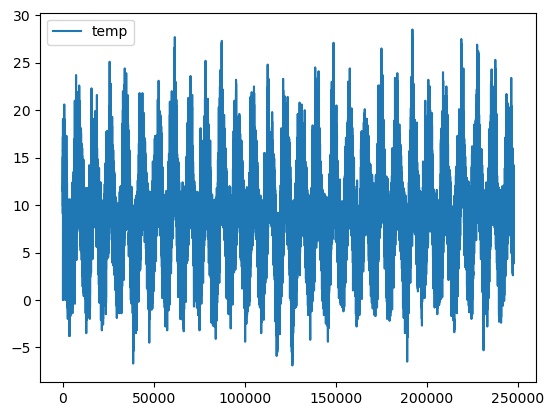

In [29]:
import seaborn as sns

sns.lineplot(data=df[['day_month','temp']])


plt.show()

### The mean temperature each day
To plot by the mean temperature each day we can use the `groupby` command in pandas.


In [7]:
daily_mean_temp = df.groupby('date_only')['temp'].mean()

In [ ]:
import matplotlib.pyplot as plt

daily_mean_temp.plot(kind='line')
plt.title('Daily mean temperature over time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

### The mean temperature for each month

To do this we slightly modify the code above to extract the year and month from the date_only column.

In [39]:
df['year_month'] = df['date_only'].dt.to_period('M')

Group by 'year_month' and calculate the mean temperature

In [40]:
monthly_mean_temp = df.groupby('year_month')['temp'].mean()

In [ ]:
monthly_mean_temp.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Mean Monthly Temperature')
plt.show()

## The mean temperature for each month
The Windspeed (there is data missing from this column)
The rolling windspeed (say over 24 hours)
### The max windspeed for each day

The monthly mean of the daily max windspeeds (yer I am being nasty here)

### The max windspeed for each day
There is some missing data from the windspeed column, to drop this data use `dropna()`. To keep things clean I am going to create a clean dataset with just the windspeed and date. 

KeyError: "['windsp'] not in index"

In [ ]:
daily_max_wind = df.groupby('date_only')['wedsp'].mean()

print(df.info())